# Figure S08. GO term semantic similarity of susceptibility-associated

genes

In [ ]:
library(tidyr)
library(dplyr)



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

In [ ]:
source("bin/outs.R")



Attaching package: 'kableExtra'

The following object is masked from 'package:dplyr':

    group_rows


Attaching package: 'flextable'

The following objects are masked from 'package:kableExtra':

    as_image, footnote

here() starts at /Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript

$strain_table
$strain_table$html
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S1/table_S1.html"

$strain_table$tsv
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S1/table_S1.tsv.zip"

$strain_table$docx
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S1/table_S1.docx"

$strain_table$csv
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S1/table_S1.csv"


$tox_table_ft
$tox_table_ft$html
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S2/table_S2.html"

$tox_table_ft$tsv
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S2/table_S2.tsv.zip"

$tox_table_ft$docx
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S2/table_S2.docx"

$tox_table_ft$csv
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S2/table_S2.csv"


$trait_table
$trait_table$html
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S3/table_S3.html"

$trait_table$tsv
[1] "

# Functions

In [ ]:
update_matrix_names <- function(matrix, key) {
  # Get current names
  current_names <- rownames(matrix)

  # Create a named vector for mapping
  name_map <- setNames(key$nice_drug_label2, key$trait)
  
  # Update row names
  rownames(matrix) <- name_map[current_names]
  
  # Update column names
  colnames(matrix) <- name_map[colnames(matrix)]
  
  return(matrix)
}

create_heatmap <- function(similarity_matrix, title, con_metadata_df, anno_cols) {
  # Perform hierarchical clustering on rows to get the dendrogram
  row_dist <- dist(similarity_matrix)
  row_hclust <- hclust(row_dist)

  # Use the same clustering order for both rows and columns
  # (since it's a symmetric similarity matrix)
  p <- pheatmap::pheatmap(
    similarity_matrix,
    annotation_row = con_metadata_df,
    annotation_colors = anno_cols,
    width = 7.5,
    height = 6,
    color = colorRampPalette(c("white", "navy", "darkred"))(100),
    breaks = seq(0, 1, length.out = 101),
    show_colnames = TRUE,
    fontsize_number = 12,
    cluster_rows = row_hclust,
    cluster_cols = row_hclust,
    main = title,
    silent = TRUE
  )
  return(p)
}

# Function to calculate average of unique trait pairs
calculate_avg_similarity <- function(matrix) {
  # Get upper triangle values (excluding diagonal)
  # This gives us unique pairs where order doesn't matter
  upper_tri_values <- matrix[upper.tri(matrix, diag = FALSE)]
  
  # Calculate and return the average and SD
  return(list(
    mean = mean(upper_tri_values, na.rm = TRUE),
    sd = sd(upper_tri_values, na.rm = TRUE)
  ))
}


# Inputs

In [ ]:
# path to the all genes semantic similarity data
all_genes_semsim_fn <- "data/processed/semantic_similarity/all_genes_semSim.rds"

# path to the candidate genes semantic similarity data
candidate_semsim_fn <- "data/processed/semantic_similarity/candidate_semSim.rds"

# path to condition metadata
con_metadata_fn <- "data/processed/tox_data/con_metadata.csv"


# Main

In [ ]:

# load the semantic similarity data
all_genes_semSim <- readRDS(all_genes_semsim_fn)
candidate_semSim <- readRDS(candidate_semsim_fn)

# Calculate average similarity for unique trait pairs
stats_all_genes <- calculate_avg_similarity(all_genes_semSim)
stats_candidate <- calculate_avg_similarity(candidate_semSim)

message(sprintf("Average semantic similarity (all genes): %.4f (SD: %.4f)", 
                stats_all_genes$mean, stats_all_genes$sd))


Average semantic similarity (all genes): 0.6754 (SD: 0.1434)

Average semantic similarity (candidate genes): 0.2451 (SD: 0.1026)

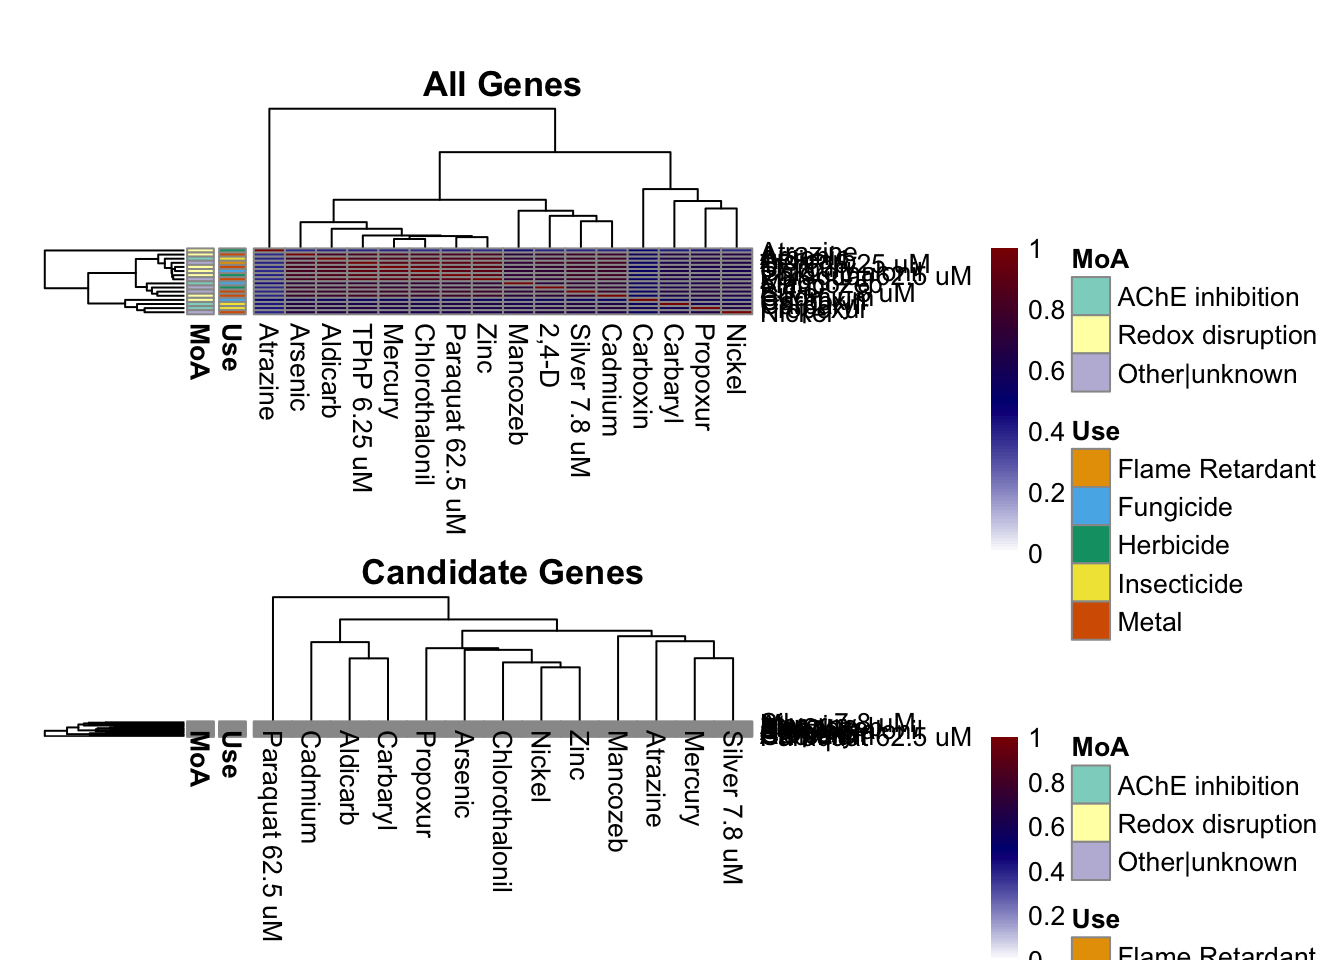

[1] "Saving combined semantic similarity heatmap to /Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/figures/figure_S8/figure_S8.png"
[2] "Saving combined semantic similarity heatmap to /Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/figures/figure_S8/figure_S8.eps"
[3] "Saving combined semantic similarity heatmap to /Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/figures/figure_S8/figure_S8.jpg"

quartz_off_screen 
                2 

In [ ]:
# Load and prepare condition metadata for annotations
con_metadata <- fread(con_metadata_fn) %>%
  dplyr::select(-diluent)

class.pal.df <- tibble::tibble(
  col = c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#D55E00"),
  big_class = c("Flame Retardant", "Fungicide", "Herbicide", "Insecticide", "Metal")
)

# Create a dataframe with the three columns
con_metadata_df <- con_metadata %>%
  dplyr::left_join(class.pal.df, by = c("big_class" = "big_class")) %>%
  dplyr::select(nice_drug_label2, big_class, moa_class, col) %>%
  dplyr::mutate(
    Use = factor(big_class, levels = c(
      "Flame Retardant",
      "Fungicide",
      "Herbicide",
      "Insecticide",
      "Metal"
    )),
    MoA = factor(moa_class, levels = c(
      "AChE inhibition",
      "Redox disruption",
      "Other|unknown"
    ))
  )

# Create annotation colors
annotation_colors <- list(
  # Map colors to Use categories (big_class)
  Use = setNames(
    c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#D55E00"),
    c("Flame Retardant", "Fungicide", "Herbicide", "Insecticide", "Metal")
  ),
  # Map colors to MoA categories
  MoA = setNames(
    c("#8DD3C7", "#FFFFB3", "#BEBADA"),
    c("AChE inhibition", "Redox disruption", "Other|unknown")
  )
)

# Update matrix names using the update_matrix_names function
all_genes_semSim <- update_matrix_names(all_genes_semSim, con_metadata)
candidate_semSim <- update_matrix_names(candidate_semSim, con_metadata)

# remove the color column now from the metadata
con_metadata_pre_p_df <- dplyr::select(con_metadata_df, -col) %>%
  tibble::column_to_rownames(var = "nice_drug_label2") %>%
  dplyr::select(Use, MoA)

# Create heatmaps for each gene set
all_genes_semSim_plot <- create_heatmap(all_genes_semSim, "All Genes", con_metadata_pre_p_df, annotation_colors)
candidate_semSim_plot <- create_heatmap(candidate_semSim, "Candidate Genes", con_metadata_pre_p_df, annotation_colors)

# # extract the legend grob from the first plot
# legend_index <- which(grepl("legend", all_genes_semSim_plot$gtable$layout$name))
# common_legend <- all_genes_semSim_plot$gtable$grobs[[legend_index]]

# # Remove the legends from both heatmap gtables by replacing them with a null grob.
# all_genes_semSim_plot$gtable$grobs[[legend_index]] <- nullGrob()


combined_heatmaps <- grid.arrange(
  all_genes_semSim_plot$gtable, 
  candidate_semSim_plot$gtable, 
  ncol = 1,  # Single column layout
  heights = c(1.2, 1),  # First plot 20% taller
  top = textGrob("", gp = gpar(fontsize = 14)),  # Empty title to create space
  left = textGrob("", gp = gpar(fontsize = 14)),  # Empty left margin for labels
  padding = unit(5, "mm")  # Add some padding
)
